In [3]:
# Read yaml file
import yaml

with open('config/config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)
#config 

In [5]:
# Load libraries

import pandas as pd
import numpy as np


df = pd.DataFrame(columns=['k', 'N'])

for k in config['n_topics']:
    name = f"{config['workdir']}/{config['names']}/{k}/topmodel/topModel_{config['names']}_{k}.p"
    #print(name)
    top_model = Topyfic.read_topModel(name)
    
    tmp = pd.DataFrame([[k, top_model.N]], columns=['k', 'N'])
    df = pd.concat([df, tmp])
df

Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!


,k,N
0,5,12
0,10,15
0,11,13
0,12,13
0,13,12
0,14,13
0,15,14
0,16,14
0,17,13
0,18,13


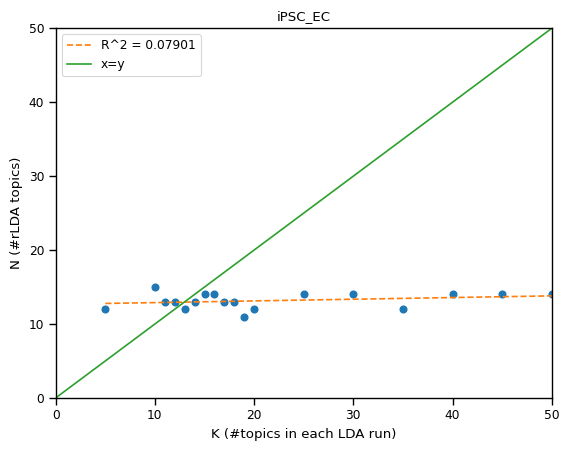

In [6]:
#from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

x = df['k'].tolist()
y = df['N'].tolist()

plt.plot(x, y, 'o')
    
# Define interpolators.
x = df['k'].values.reshape(-1, 1)
y = df['N'].values.reshape(-1, 1)
model = LinearRegression()
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

x_pred = np.linspace(5, 50, num=41, endpoint=True)
y_pred = model.predict(x_pred.reshape(-1, 1))
plt.plot(x_pred, y_pred, 
             linestyle='dashed', 
             label=fr'R^2 = {round(r_sq, 5)}')

    
plt.plot([0] + config['n_topics'], [0] + config['n_topics'], linestyle='solid', label='x=y')    
#plt.axvline(x=10, color="red", linestyle="solid", label='k=10')
plt.xlabel('K (#topics in each LDA run)')
plt.ylabel('N (#rLDA topics)')
plt.ylim([0,50])
plt.xlim([0,50])
plt.title(f"{config['names']}")
plt.legend(loc='best')
plt.savefig(f'k_n_prediction.pdf')

In [21]:
import mudata as md
import anndata as ad
import scanpy as sc
import Topyfic
import pandas as pd

adata = sc.read_h5ad(config['count_adata'][config['names']])
adata.layers['PFlog1pPF_normalization'] = adata.X

for k in config['n_topics']:
    
    name = f"{config['workdir']}/{config['names']}/{k}/topmodel/analysis_{config['names']}_{k}.p"

    analysis = Topyfic.read_analysis(name)

    df_gene_weights = analysis.top_model.get_gene_weights()

    topyfic = analysis.cell_participation.copy()

    topyfic.var.index = df_gene_weights.columns.tolist()

    topyfic.uns['var_names'] = df_gene_weights.index.to_numpy()
    topyfic.varm['loadings'] = df_gene_weights.to_numpy().T

    mdata = md.MuData({"rna": adata, "Topyfic": topyfic})
    
    mdata.write(f"{config['workdir']}/{config['names']}/{k}/topmodel/Topyfic_{config['names']}_{k}.h5mu")

Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
Reading Analysis done!
